# Chapter 17 Scopes
--- 
Python’s **scopes—the places where variables are defined and looked up**. Like module files, *scopes help prevent name clashes* across your program’s code: names defined in one program unit don’t interfere with names in another. 

## Python Scope Basics
When you use a name in a program, Python creates, changes, or looks up the name in what is known as a **namespace—a place where names live**. When we talk about the search for a name’s value in relation to code, **the term scope refers to a namespace: that is, the location of a name’s assignment in your source code determines the scope of the name’s visibility to your code**.

*names* in Python spring into *existence when they are first assigned values*, and they *must be assigned before they are used*. Because names are not declared ahead of time, **Python uses the location of the assignment of a name to associate it with (i.e., bind it to) a particular namespace and hence its scope of visibility**. 

Besides packaging code for reuse, **functions add an extra namespace layer to your programs** to minimize the potential for collisions among variables of the same name—**by default, all names assigned inside a function are associated with that function’s namespace**, and no other.
- Names assigned *inside a def can only be seen by the code within that def*. You cannot even refer to such names from outside the function.
- Names assigned *inside a def do not clash with variables outside the def, even if the same names are used* elsewhere.

---

The scope of a variable (where it can be used) is always determined by where it is assigned in your source code.
- If a variable is *assigned inside a def, it is local to that function*.
- If a variable is *assigned in an enclosing def, it is nonlocal to nested functions*.
- If a variable is *assigned outside all defs, it is global to the entire file*.

This is **lexical scoping** because *variable scopes are determined entirely by the locations of the variables in the source code* of your program files, not by function calls. 

> function scopes help to avoid name clashes in your programs and help to make functions more self-contained program units—their code need not be concerned with names used elsewhere.

## Scope Details 
all the code we wrote was at the top level of a module (i.e., not nested in a def), so the names we used either lived in the module itself or were built-ins predefined by Python.

Functions  define  a  local  scope  and  modules  define  a  global scope with the following properties:

- The enclosing module is a global scope : Each module is a global scope—that is, a namespace in which variables created (assigned) at the top level of the module file live. Global variables become attributes of a module object to the outside world after imports but can also be used as simple variables within the module file itself. 
- The global scope spans a single file only : names at the top level of a file are global to code within that single file only. There is really no notion of a single, all-encompassing global file-based scope in Python.
- Assigned names are local unless declared global or nonlocal : default, all the names assigned inside a function definition are put in the local scope (the namespace associated with the function call).

> If you need to assign a name that lives in an enclosing def, as of Python 3.X you can do so by declaring it in a nonlocal statement.

- All other names are enclosing function locals, globals, or built-ins : Names not assigned a value in the function definition are assumed to be enclosing scope locals, defined in a physically surrounding def statement; globals that live in the enclosing  module’s  namespace;  or  built-ins  in  the  predefined  built-ins  module Python provides.
- Each call to a function creates a new local scope : Every time you call a function, you create a new local scope—that is, a namespace in which the names created inside that function will usually live. 

> note that any type of assignment within a function classifies a name as local. This includes = statements, module names in import, function names in def, function argu- ment names, and so on.

## Name Resolution: The LEGB Rule 
- Name assignments create or change local names by default.
- Name references search at most four scopes: local, then enclosing functions (if any), then global, then built-in. 
- Names declared in global and nonlocal statements map assigned names to en- closing module and function scopes, respectively.

> Functions can freely use names as- signed in syntactically enclosing functions and the global scope, but they must declare such nonlocals and globals in order to change them.

Python’s name-resolution scheme is sometimes called the LEGB rule

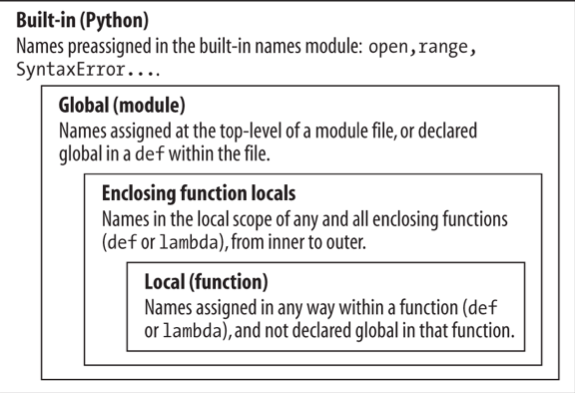

use an unqualified name inside a function, Python searches up to fourscopes
- the local (L) scope, then the local scopes of any enclosing (E) defs and lambdas, then the global (G) scope, and then the built-in (B) scope—and stops at the first place the name is found.

When you assign a name in a function (instead of just referring to it in an expres-
sion), Python always creates or changes the name in the local scope, unless it’s declared to be global or nonlocal in that function.

When you assign a name outside any function (i.e., at the top level of a module
file, or at the interactive prompt), the local scope is the same as the global scope— the module’s namespace.


The underlying rationale for this name-segregation scheme is that local variables serve as temporary names that you need only while a function is running. Functions are self-contained units of software.

### The Built-in Scope 
the built-in scope is just a built-in module called builtins Because Python automatically searches this module last in its LEGB lookup, you get all the names in this list “for free”—that is, you can use them without importing any modules.

redefining a built-in name is often a bug, and a nasty one at that, because Python will not issue a warning message about it.

## The global Statement
they are namespace declarations. The **global statement tells Python that a function plans to change one or more global names—that is, names that live in the enclosing module’s scope (namespace)**.
- Global names are variables assigned at the top level of the enclosing module file.
- Global names must be declared only if they are assigned within a function.
- Global names may be referenced within a function without being declared.

`global` allows us to *change names that live outside a def at the top level of a module file*.

The `nonlocal` statement is **almost identical but applies to names in the enclosing def’s local scope**, rather than names in the enclosing module.z


### Program Design: Minimize Global Variables 
By default, *names assigned in functions are locals*, so if you want to change names outside functions you have to write extra code (e.g., global statements). 

> Changing globals can lead to well-known software engineering problems: because the variables’ values are depen- dent on the order of calls to arbitrarily distant functions, programs can become difficult to debug, or to understand at all. 

>Programs that use multithreading to do parallel processing in Python also commonly depend on **global variables—they become shared memory between functions running in parallel threads**.

### Program Design: Minimize Cross-File Changes 
although **we can change variables in another file directly, we usually shouldn’t**. 

we must import the first module into the second file to get to its variable at all—as we’ve learned, each module is a self-contained namespace (package of vari- ables), and we must import one module to see inside it from another. That’s the main point about modules: by segregating variables on a per-file basis, they avoid name collisions across files, in much the same way that local variables avoid name clashes across functions. 

 the global scope of a module file be- comes the attribute namespace of the module object once it is imported—importers automatically have access to all of the file’s global variables, because a file’s global scope morphs into an object’s attribute namespace when it is imported. 
 
cross-file variable changes are always possible in Python, they are usually much more subtle than you will want. Again, this sets up too strong a coupling between the two files—because they are both dependent on the value of the variable  X, it’s difficult to understand or reuse one file without the other. Such implicit cross-file de- pendencies can lead to inflexible code at best, and outright bugs at worst.

—when a person reading the first module by itself sees a function, that person will know that it is a point of interface and will expect the change to the X. In other words, it removes the element of surprise that is  rarely  a  good  thing  in  software  projects.

### Other Ways to Access Globals 
global-scope variables morph into  the attributes of a loaded module object, we can emulate the global statement by importing the enclosing module and assigning to its attributes


In [20]:
j = 10
import sys
sys.modules[__name__].j=11

It illustrates the **equivalence of globals to module attributes**, but it’s *much more work than using the global statement to make your intentions explicit*.

## Scopes and Nested Functions

Enclosing scopes are sometimes also called **statically nested scopes**, it takes the *form of the local scopes of any and all enclosing function’s local scopes*. Really, the nesting is a lexical one— **nested scopes correspond to physically and syntactically nested code structures** in your program’s source code text.


### Nested Scope Details 
- A reference (X) looks for the name X first in the current local scope (function); then in the local scopes of any lexically enclosing functions in your source code, from inner to outer; then in the current global scope (the module file); and finally in the built-in scope (the module builtins). global declarations make the search begin in the global (module file) scope instead.
- An  assignment (X = value) creates or changes the name X in the current local scope, by default. If X is declared global within the function, the assignment creates or changes the name X in the enclosing module’s scope instead. If, on the other hand,  X is declared nonlocal within the function in 3.X (only), the assignment changes the name X in the closest enclosing function’s local scope.

When nested functions are present, variables in enclosing functions may be referenced, but they require 3.X nonlocal declarations to be changed.

### Nested Scope Examples 

> The def is simply an executable statement, which can appear anywhere any other statement can—including nested in another def.

This enclosing scope lookup works even if the enclosing function has already returned. Functions are objects in Python like everything else, and can be passed back as return values from other functions.

### Factory Functions: Closures 
this sort of behavior is also sometimes called a closure or a factory function

Factory functions (a.k.a. closures) are sometimes *used by programs that need to generate event handlers on the fly in response to conditions at runtime*.

> The function object in question remembers  values  in  enclosing  scopes  regardless  of  whether  those  scopes  are  still present in memory.

Variable from the enclosing local scope is retained as state information attached to the enclosed function, which is why we can reference variables from the enclosing function. each call to a factory function like this gets its own set of state information.

### Closures versus classes, round 1 
closure functions often provide a lighter-weight and viable alternative when re- taining state is the only goal. They provide for per-call localized storage for data required by a single nested function. 

### Retaining Enclosing Scope State with Defaults 
The syntax `arg=val` in a *def header means that the argument arg will default to the value val if no real value is passed to arg in a call*. This syntax is used here to **explicitly assign enclosing scope state to be retained**.

### Nested scopes, defaults, and lambdas 
an expression that generates a new function to be called later, much like a def stat ement. Because it’s an expression, though, it can be used in places that def cannot, such as within list and dictionary literals.

#### Loop variables may require defaults, not scopes 
if a lambda or def defined within a function is nested inside a loop, and the nested function references an enclosing scope variable that is changed by that loop, all functions generated within the loop will have the same value—the value the referenced variable had in the last loop iteration because the enclosing scope variable is looked up when the nested functions are later called.

In [21]:
def act():
    global lis
    lis = []
    for i in range(8):
        lis.append(lambda x: i*x)

act()
print(lis[0](1),lis[1](1),lis[6](1))

7 7 7


In such cases, you must still use defaults to save the variable’s current value instead. we still have to explicitly retain enclosing scope values with default arguments, rather than enclosing scope references. 
Because defaults are evaluated when the nested function is created (not when it’s later called)

### Arbitrary scope nesting 
scopes may nest arbitrarily, but only enclosing function def statements are searched when names are referenced. Python will search the local scopes of all enclosing defs, from inner to outer, after the referencing function’s local scope and before the module’s global scope or built-ins. 

## The nonlocal Statement in 3.X
Nested functions can reference variables in an enclosing function’s scope, even if that function has already returned.

we can also change such enclosing scope vari- ables, as long as we declare them in nonlocal statements. With this statement, nested defs can have both read and write access to names in enclosing functions.

nonlocal applies to a name in an enclosing function’s scope, not the global module scope outside all defs. Also unlike global, nonlocal names must already exist in the enclosing function’s scope when declared—they can exist only in enclosing functions and cannot be created by a first assignment in a nested def. 

### nonlocal Basics
This statement allows a nested function to change one or more names defined in a syntactically enclosing function’s scope.

In 3.X, declaring the enclosing scopes’ names in a nonlocal statement enables nested functions to assign and thus change such names as well. 

provides a way for enclosing functions to provide writeable state information, remembered when the nested function is later called. Allowing the state to change makes it more useful to the nested function.

the nonlocal statement also forces  the  issue  for  references—much  like  the  global  statement,  nonlocal  causes searches for the names listed in the statement to begin in the enclosing defs’ scopes, not in the local scope of the declaring function. That is, nonlocal also means “skip my local scope entirely.”

nonlocal names can appear only in enclosing defs, not in the module’s global scope or built-in scopes outside the defs.

> The nonlocal statement mostly serves to allow names in enclosing scopes to be changed rather than just referenced. 

global makes scope lookup begin in the enclosing module’s scope and allows
names there to be assigned. Scope lookup continues on to the built-in scope if the name does not exist in the module, but assignments to global names always create or change them in the module’s scope.

nonlocal restricts scope lookup to just enclosing defs, requires that the names already exist there, and allows them to be assigned. Scope lookup does not continue on to the global or built-in scopes.

#### nonlocal in Action 

In [26]:
j = 9
def test():
    l = 9
    def t():
        nonlocal l
        print(l)
        l = 11 
    t()
    print(l)
test()

9
11


The state object in the enclosing scope is essentially attached to the nested function object returned; each call makes a new, distinct state object, such that updating one function’s state won’t impact the other.

#### Boundary cases 
nonlocal names really must have previously been assigned in an en- closing def’s scope when a nonlocal is evaluated, or else you’ll get an error—you cannot create them dynamically by assigning them anew in the enclosing scope. In fact, they are checked at function definition time before either an enclosing or nested function is called.

nonlocal restricts the scope lookup to just enclosing defs; nonlocals are not looked up in the enclosing module’s global scope or the built-in scope outside all defs

## Why nonlocal? State Retention Options
While functions can return results, their local variables won’t normally retain other values that must live on between calls. Moreover, many appli- cations require such values to differ per context of use. 

> the nonlocal statement allows mul- tiple copies of changeable state to be retained in memory. It addresses simple state- retention needs where classes may not be warranted and global variables do not apply, though function attributes can often serve similar roles more portably.

### State with nonlocal: 3.X only 
We need to declare variables nonlocal only if they must be changed (other enclosing scope name references are automatically retained as usual), and nonlocal names are still not visible outside the enclosing function.

### State with Globals: A Single Copy Only 
only allows for a single shared copy of the state information in the module scope, it requires global declarations in both functions and is prone to name collisions in the global scope.

### State with Classes: Explicit Attributes (Preview) 

### State with Function Attributes: 3.X and 2.X 
function attributes—user-defined names attached to functions directly. 

Because factory functions make a new function on each call any- how, this does not require extra objects—the new function’s attributes become per- call state in much the same way as nonlocals, and are similarly associated with the generated function in memory. 

function attributes allow state variables to be accessed outside the nested function, like class attributes.

### State with mutables: Obscure ghost of Pythons past? 
it’s also possible to change a mutable object in the enclosing scope in 2.X and 3.X without declaring its name nonlocal. in-place object changes do not classify a name as local.